In [1]:
import random as rd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error #, r2_score

import gspread
from sqlalchemy import create_engine
import re

gc = gspread.service_account(filename="./credentials.json")

import environ
env = environ.Env()
database_url = env.str(
    var="DATABASE_URL", default="postgres://postgres:@postgres:5432/postgres"
)
engine = create_engine(database_url, echo=False)

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=5)
# model.evaluate(x_test, y_test)

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

n_samples, n_features = 1000, 20
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)
# positive integer target correlated with X[:, 5] with many zeros:
y = rng.poisson(lam=np.exp(X[:, 5]) / 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)
glm = PoissonRegressor()
gbdt = HistGradientBoostingRegressor(loss='poisson', learning_rate=.01)
lg = LinearRegression().fit(X_train, y_train)
glm.fit(X_train, y_train)
gbdt.fit(X_train, y_train)
print(lg.score(X_test, y_test))
print(glm.score(X_test, y_test))
print(gbdt.score(X_test, y_test))

0.3956500969303114
0.35776189065725783
0.42425183539869415


In [4]:
X

array([[ 1.76405235,  0.40015721,  0.97873798, ..., -0.20515826,
         0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , ...,  1.20237985,
        -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019, ...,  0.3024719 ,
        -0.63432209, -0.36274117],
       ...,
       [-0.85259255, -0.1797548 , -0.84311081, ...,  0.62572622,
        -0.59228872, -0.73691532],
       [-0.06113942, -0.49714704,  0.43210231, ..., -0.7888105 ,
         0.20570363,  0.34291633],
       [-0.75590132,  0.9190708 ,  1.53418368, ..., -0.05725925,
        -1.05893126, -0.32652844]])

In [5]:
train_x = np.array([[50,10], [55,12], [60,20]])
train_y = np.array([20,30,33])

test_x = np.array([[55,12],[57, 10]])
test_y = np.array([30,35])
reg = LinearRegression().fit(train_x,train_y)
reg.score(test_x, test_y)

0.5889777777777729

In [6]:
pre = reg.predict([[70, 21]])
print(type(train_y))
pre[0]

<class 'numpy.ndarray'>


56.5

Text(0, 0.5, 'won')

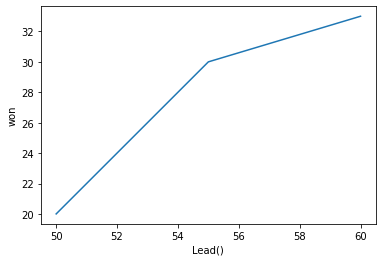

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
X = [train_x[i][0] for i in range(len(train_x))]
Z = [train_x[i][1] for i in range(len(train_x))]
train_y
# pp = Axes3D.plot_wireframe(X, train_y, Z)
p1= plt.plot(X, train_y)
plt.xlabel("Lead()")
plt.ylabel("won")

Text(0, 0.5, 'won')

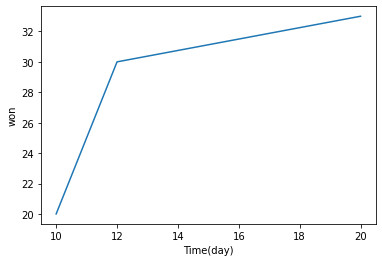

In [8]:
p2= plt.plot(Z, train_y)
plt.xlabel("Time(day)")
plt.ylabel("won")

In [9]:
data = pd.read_sql("etl_google_ads", engine)

In [10]:
data.describe()

,Date,CampaignName,Id,AdGroupName,Criteria,Status,Clicks,Impressions,Cost,Ctr,Conversions,ConversionRate,CostPerConversion
count,153797,153797,153797,153797,153797,153797,153797,153797,153797,153797,153797,153797,153797
unique,127,8,398,25,393,3,28,156,888,259,7,15,39
top,2020-11-09,e-Memo,296588230974,Product 250121,e document,enabled,0,0,0,0.00%,0,0.00%,0
freq,1211,130048,1270,29718,1397,143637,152750,150184,152747,152750,153759,153759,153759


In [11]:
data.shape

(153797, 13)

In [12]:
data.dtypes

Date                 object
CampaignName         object
Id                   object
AdGroupName          object
Criteria             object
Status               object
Clicks               object
Impressions          object
Cost                 object
Ctr                  object
Conversions          object
ConversionRate       object
CostPerConversion    object
dtype: object

In [13]:
data.isnull().sum()

Date                 0
CampaignName         0
Id                   0
AdGroupName          0
Criteria             0
Status               0
Clicks               0
Impressions          0
Cost                 0
Ctr                  0
Conversions          0
ConversionRate       0
CostPerConversion    0
dtype: int64

In [14]:
data['Cost'] = data['Cost'].astype(float)
data['Clicks'] = data['Clicks'].astype(float)
data['Impressions'] = data['Impressions'].astype(float)
data.eq(0).sum()

Date                      0
CampaignName              0
Id                        0
AdGroupName               0
Criteria                  0
Status                    0
Clicks               152750
Impressions          150184
Cost                 152747
Ctr                       0
Conversions               0
ConversionRate            0
CostPerConversion         0
dtype: int64

In [28]:
data = data.query('Cost != 0 and Cost < 200 and Impressions <= 250 and Clicks > 0')
data.eq(0).sum()

Date                 0
CampaignName         0
Id                   0
AdGroupName          0
Criteria             0
Status               0
Clicks               0
Impressions          0
Cost                 0
Ctr                  0
Conversions          0
ConversionRate       0
CostPerConversion    0
dtype: int64

In [29]:
data.shape

(1023, 13)

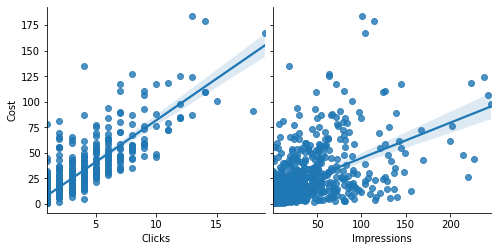

In [30]:
sns.pairplot(data, x_vars=['Clicks','Impressions'], y_vars='Cost', height=3.5,kind='reg')

plt.show()

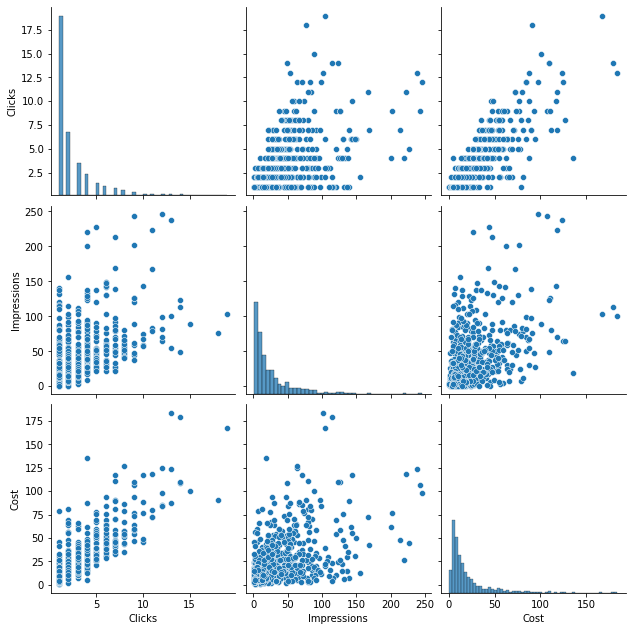

In [31]:
g = sns.pairplot(data)
g.fig.set_size_inches(9, 9)

In [32]:
data_x = data[['Clicks', 'Impressions']]
data_y = data.Cost

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y)

In [56]:
lr = LinearRegression().fit(X_train, y_train)
sc = lr.score(X_test, y_test)
sc

0.728455457489674

In [59]:
lr.coef_ , lr.intercept_  # m and b

(array([7.75445236, 0.0357248 ]), 0.33203694201147016)

In [36]:
pre_data = lr.predict(X_test)
mean_squared_error(y_test, pre_data)

147.32163461703416

In [55]:
mean_absolute_error(y_test, pre_data)

7.122579700114655

In [64]:
d_pre = {'Clicks': X_test.Clicks.values, 'Impressions': X_test.Impressions.values, 'Cost true': y_test.values, 'Cost predict': pre_data}
df_pre = pd.DataFrame(d_pre)
df_pre.sort_values(['Clicks', 'Impressions'], ascending=False)

,Clicks,Impressions,Cost true,Cost predict
101,14.0,114.0,178.95,112.966997
219,13.0,54.0,87.43,103.069057
14,12.0,82.0,84.56,96.314899
234,11.0,167.0,72.58,91.597054
59,11.0,84.0,79.67,88.631896
...,...,...,...,...
206,1.0,1.0,8.76,8.122214
233,1.0,1.0,10.87,8.122214
238,1.0,1.0,5.30,8.122214
242,1.0,1.0,3.29,8.122214


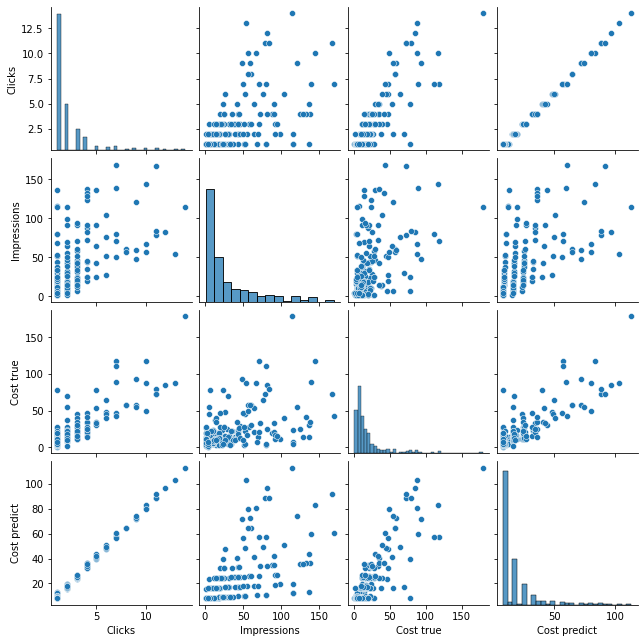

In [58]:
p = sns.pairplot(df_pre)
p.fig.set_size_inches(9, 9)

In [66]:
spent_fb = pd.read_sql("etl_marketing_facebook", engine)
spent_fb

,ad_id,ad_name,adset_name,campaign_id,campaign_name,clicks,cpc,cpm,cpp,ctr,...,spend,unique_clicks,campaign_objective,status,type,landing_page_view,product,objective,Campaign name,artwork
0,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,65,1.588462,176.797945,202.848723,11.130137,...,103.25,65,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
1,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,74,2.211486,168.01848,233.452211,7.597536,...,163.65,72,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
2,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,79,2.166329,135.610143,196.93901,6.259905,...,171.14,78,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
3,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,21,2.950476,152.610837,179.594203,5.172414,...,61.96,21,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
4,23845970223610634,Video-071020,Biz-071020,23845806592580634,PRO:EMEM_OBJ:LEAD_CN:NORM_AW:SING_CONT:MIX,15,4.051333,394.61039,407.852349,9.74026,...,60.77,14,LEAD_GENERATION,PAUSED,daily,None,EMEM,LEAD,NORM,SING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,23847040714150634,AW:SING_CONT:4STEPS_,BISS-JOBSTITLE-TECH-220221,23846644567000634,PRO:EMEM_OBJ:CONV_CN:NORM_AW:SING_CONT:4STEPS,187,2.586952,54.588129,59.139364,2.110133,...,483.76,168,CONVERSIONS,ACTIVE,daily,74,EMEM,CONV,NORM,SING
431,23847084872460634,AW:SING_CONT:4STEPS_,LOOKALIKE-WEBSITE-VISITORS-010321,23846644567000634,PRO:EMEM_OBJ:CONV_CN:NORM_AW:SING_CONT:4STEPS,46,7.050217,110.197078,120.516537,1.563031,...,324.31,38,CONVERSIONS,ACTIVE,daily,19,EMEM,CONV,NORM,SING
432,23847084922800634,AW:VIDEO_CONT:FEATURES,BISS&IT-TECH-010321,23847084922780634,PRO:EMEM_OBJ:VIDEO_CN:NORM_AW:VIDEO_CONT:FEATURES,13,22.933846,74.497751,74.853126,0.324838,...,298.14,13,VIDEO_VIEWS,ACTIVE,daily,7,EMEM,VIDEO,NORM,VIDEO
433,23847087335260634,AW:SING_CONT:BOSS-VS-STAFF,BISS-JOBSTITLE-TECH-010321,23847087335160634,PRO:EMEM_OBJ:ENGA_CN:EVENT-RESPONSE_AW:SING_CO...,118,0.840593,90.501825,97.627953,10.766423,...,99.19,110,POST_ENGAGEMENT,ACTIVE,daily,1,EMEM,ENGA,EVENT-RESPONSE,SING


In [67]:
spent_fb = spent_fb[spent_fb['type'] == 'daily']
feature_fb = ['clicks', 'impressions', 'spend', 'date_start']
spent_fb = spent_fb[feature_fb]

In [80]:
spent_fb['date'] = pd.to_datetime(spent_fb['date_start'])
spent_fb['spend'] = spent_fb['spend'].astype(float)
spent_fb

,clicks,impressions,spend,date_start,date
0,65,584,103.25,2020-10-02,2020-10-02
1,74,974,163.65,2020-10-03,2020-10-03
2,79,1262,171.14,2020-10-04,2020-10-04
3,21,406,61.96,2020-10-05,2020-10-05
4,15,154,60.77,2020-10-07,2020-10-07
...,...,...,...,...,...
430,187,8862,483.76,2021-03-03,2021-03-03
431,46,2943,324.31,2021-03-03,2021-03-03
432,13,4002,298.14,2021-03-03,2021-03-03
433,118,1096,99.19,2021-03-03,2021-03-03


In [70]:
spent_fb.dtypes

clicks                 object
impressions            object
spend                 float64
date_start             object
date           datetime64[ns]
dtype: object

In [92]:
# sns.pairplot(spent_fb, x_vars='date', y_vars='spend', height=4,kind='reg')

# plt.show()

<AxesSubplot:xlabel='index', ylabel='spend'>

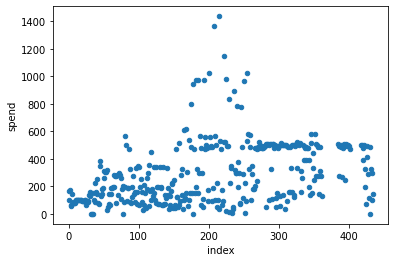

In [85]:
spent_fb[['spend']].reset_index().plot.scatter(x='index', y='spend')

In [88]:
lead_data = pd.read_sql("marketing_lead", engine)
lead_data.head()

,id,created_at,updated_at,source,compaign_name,ads_set_name,ads_id,name,company_name,phone,...,datetime,company_size,lead_name,pipedrive_enable,pipedrive_is_send,day_of_week,date,time,details,value
0,501,2021-02-19 03:34:46.058825+00:00,2021-02-22 15:24:22.743411+00:00,GG ADS,Product-250121,โปรแกรมเอกสาร,e-Memo,,,,...,2021-02-19 03:34:46.048972+00:00,,,True,False,4,2021-02-19,10:34:46.048000,,0
1,508,2021-02-19 10:42:23.608690+00:00,2021-02-22 15:24:22.808218+00:00,FB ADS,PRO:EMEM_OBJ:CONV_CN:NORM_AW:SING_CONT:4STEPS ...,IT-TECH-270121,23846978677060634,มานะ​ มงคลเภา,บ.ดูโป​ (ประเทศไทย)​,0954301477,...,2021-02-19 10:42:23+00:00,,มานะ​ มงคลเภา: บ.ดูโป​ (ประเทศไทย)​,True,False,4,2021-02-19,17:42:23,None,0
2,509,2021-02-20 19:24:01.275253+00:00,2021-02-22 15:24:22.812849+00:00,GG ORG,,,,ชุติพนธ์,ชุติพนธ์,0916982333,...,2021-02-20 19:24:00+00:00,,ชุติพนธ์: ชุติพนธ์,True,True,6,2021-02-21,02:24:00,None,0
3,158,2021-01-20 10:28:13.681791+00:00,2021-02-22 15:24:22.863933+00:00,FB ADS,,,,,บ.กรุงเทพเหล็กกล้า,,...,2020-12-01 17:00:00+00:00,,บ.กรุงเทพเหล็กกล้า,False,False,2,2020-12-02,00:00:00,,0
4,420,2021-02-08 17:08:30.513911+00:00,2021-02-22 15:24:22.876682+00:00,GG ADS,,,,,,,...,2021-02-08 17:08:30.512920+00:00,,,True,False,1,2021-02-09,00:08:30.512000,,0


In [89]:
lead_data.dtypes

id                                 int64
created_at           datetime64[ns, UTC]
updated_at           datetime64[ns, UTC]
source                            object
compaign_name                     object
ads_set_name                      object
ads_id                            object
name                              object
company_name                      object
phone                             object
email                             object
industry                          object
status                            object
reason                            object
from_url                          object
remark                            object
product                           object
datetime             datetime64[ns, UTC]
company_size                      object
lead_name                         object
pipedrive_enable                    bool
pipedrive_is_send                   bool
day_of_week                        int64
date                      datetime64[ns]
time            

In [90]:
gg_data = pd.read_sql("etl_google_ads", engine)
gg_data.head()

,Date,campaignname,id,adgroupname,criteria,status,clicks,impressions,Cost,ctr,conversions,conversionrate,costperconversion
0,2020-10-27,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
1,2020-10-28,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
2,2020-10-29,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
3,2020-10-30,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
4,2020-10-31,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0


In [91]:
gg_data.dtypes

Date                 object
campaignname         object
id                   object
adgroupname          object
criteria             object
status               object
clicks               object
impressions          object
Cost                 object
ctr                  object
conversions          object
conversionrate       object
costperconversion    object
dtype: object

In [93]:
gg_data['Cost'] = gg_data['Cost'].astype(float)
gg_data['clicks'] = gg_data['clicks'].astype(float)
gg_data['impressions'] = gg_data['impressions'].astype(float)

<AxesSubplot:xlabel='index', ylabel='Cost'>

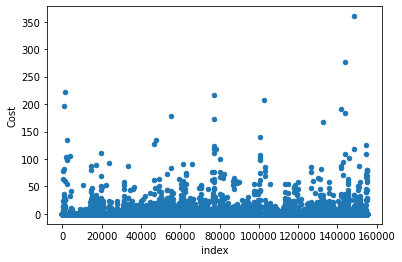

In [94]:
gg_data[['Cost']].reset_index().plot.scatter(x='index', y='Cost')

In [95]:
gg_data.dtypes

Date                  object
campaignname          object
id                    object
adgroupname           object
criteria              object
status                object
clicks               float64
impressions          float64
Cost                 float64
ctr                   object
conversions           object
conversionrate        object
costperconversion     object
dtype: object

<AxesSubplot:>

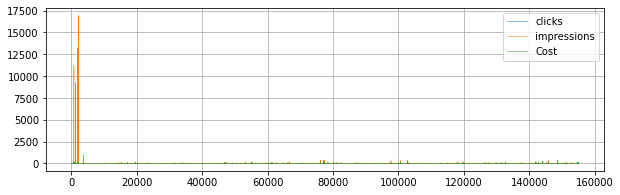

In [96]:
gg_data.plot(grid=True, lw=0.5, figsize=(10,3)) # 

In [97]:
gg_data.Date = pd.to_datetime(gg_data.Date, format='%Y-%m-%d')

In [98]:
gg_data.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

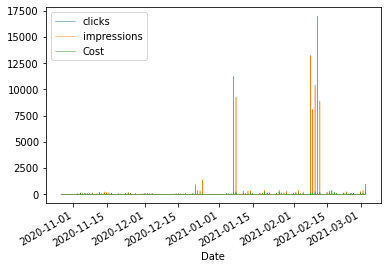

In [99]:
gg_data.plot(lw=0.5)

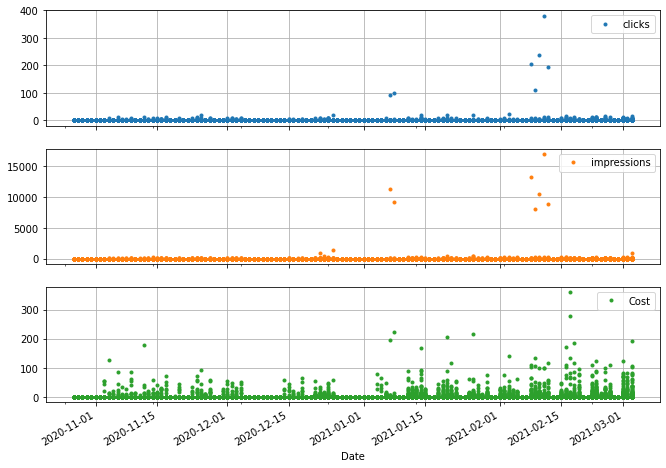

In [100]:
gg_data.plot(marker='.', linestyle='None', figsize=(11,8), subplots=True, grid=True)
plt.show()

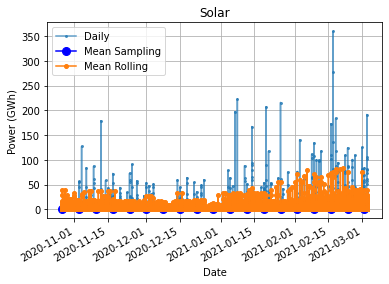

In [102]:
start, end = '2020-10','2021-3'
gg_data.Cost.loc[start:end].plot(marker='o', label='Daily', markersize=2, alpha=0.7)
gg_data.Cost.loc[start:end].resample('7d').mean().plot(marker='o', c='blue',
                                                 markersize=8, label='Mean Sampling')
gg_data.Cost.loc[start:end].rolling(7, center=True).mean().plot(marker='o',
                                                 markersize=4, label='Mean Rolling')
plt.ylabel('Power (GWh)');
plt.title('Solar')
plt.legend()
plt.grid()
plt.show()